# Data Structures Course 
Shiraz University Fall 2024    
Reza Rezazadegan   
[www.dreamintelligent.com](www.dreamintelligent.com) 

# 6- Trees

So far we have only stuied linear data structures such as sequences. In such a data structure there is only one item after a given item. However, in nonlinear data structures such as trees and graphs, each item can have more than one "next" or successor. 

Trees and graphs are extremely important data structures. In this chapter and the next few ones we study basic properties of trees and graphs and some of their applications in computer science. More detailed analysis of graphs is the subject of [Complex Network Theory](https://dreamintelligent.com/complex-network-analysis-course/). 


 
Trees can be thought of as an advanced type of linked list in which each item can have multiple `next` pointers.  
The elements of a tree are called its _nodes_.
If a node $v$ has $u$ as one of its nexts, we say $v$ is a _parent_ of $u$ and $u$ is a _child_ of $v$.   
We assume that each node has only one parent. If we relax this condition, the resulting structure is called a _graph_.   
A tree encodes a _hierarchical_ data structure.

Using trees, the Sequence and Set data strctures can have alternative implementations. 

The head of a tree is called its _root_.  

A node that does not have children is called an **leaf**. Otherwise it is an **interior node**.   
The simplest type of tree is a **binary tree** in which each node has _at most_ two children. They are called `left` and `right`. 

For the ease of computation, we keep a pointer to a node's `parent` as well.

Here are two examples of trees: the directory structure of a typical Linux system (top) and the hierarchical structure of a book's contents. 

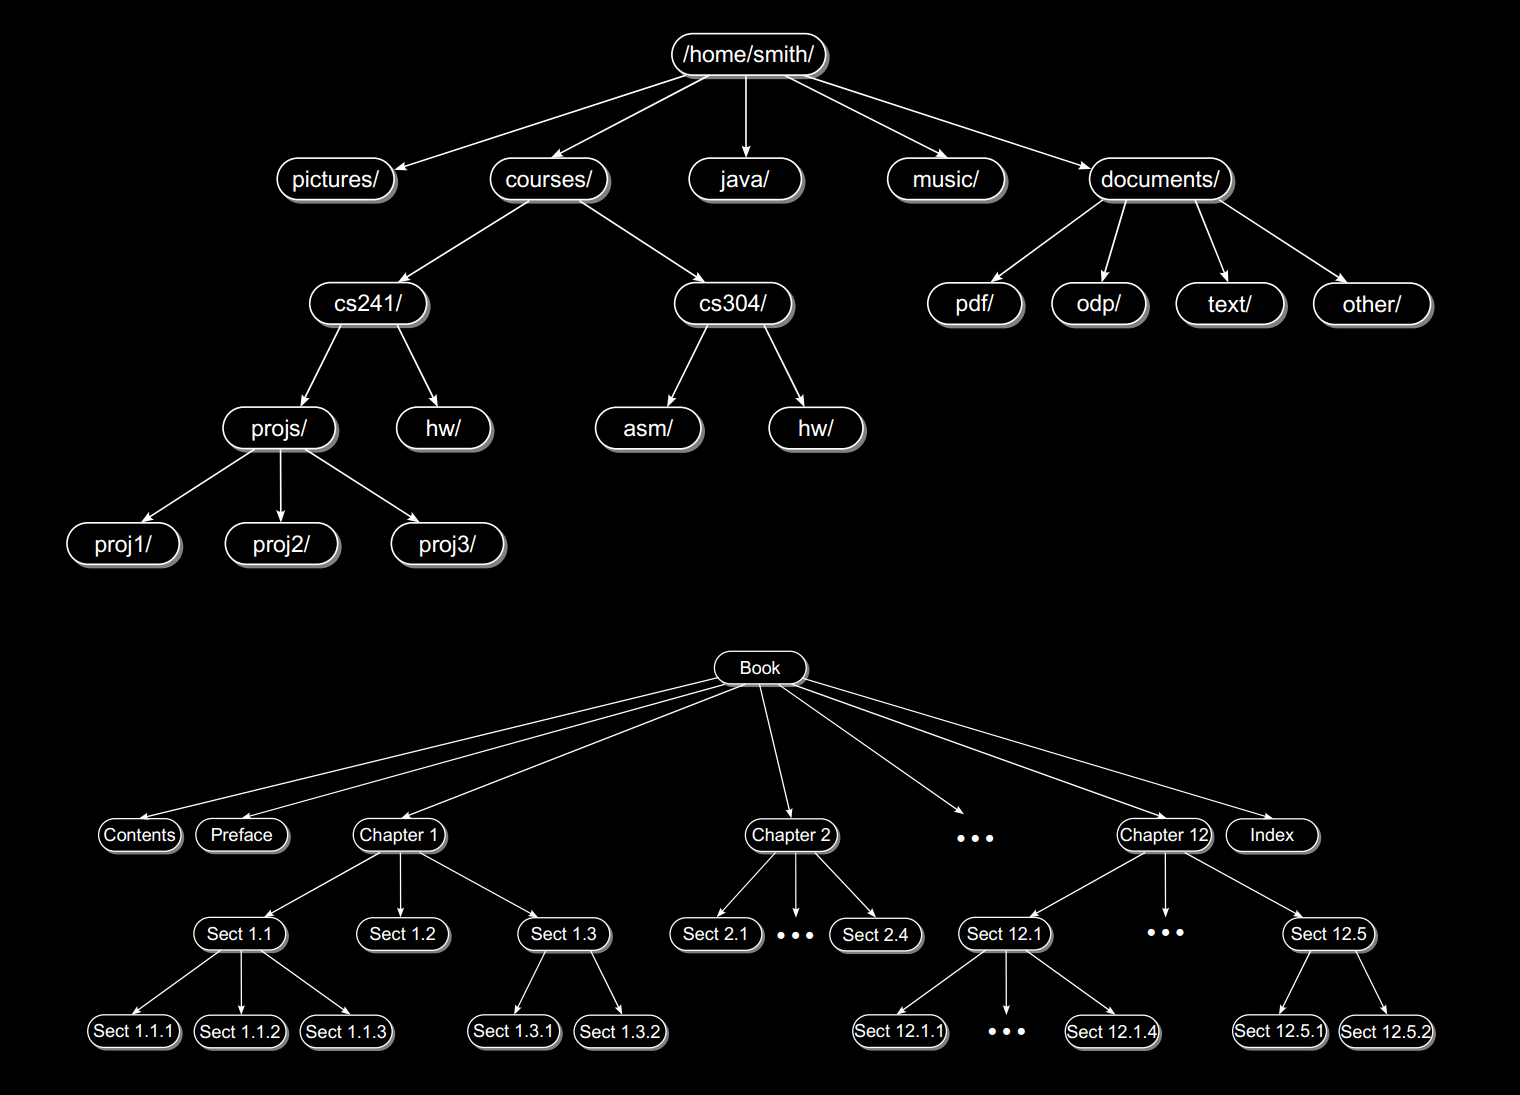

A **path** in a tree (or more generally a graph) is a sequence of nodes $v_1, v_2, \ldots, v_k$ such that $v_{i+1}$ is a child of $v_i$ for $i=2,3,\ldots, k$. The **length** of this path is $k$.  

The **depth** (or _level_) of a node is the length of any path from root to the node. 

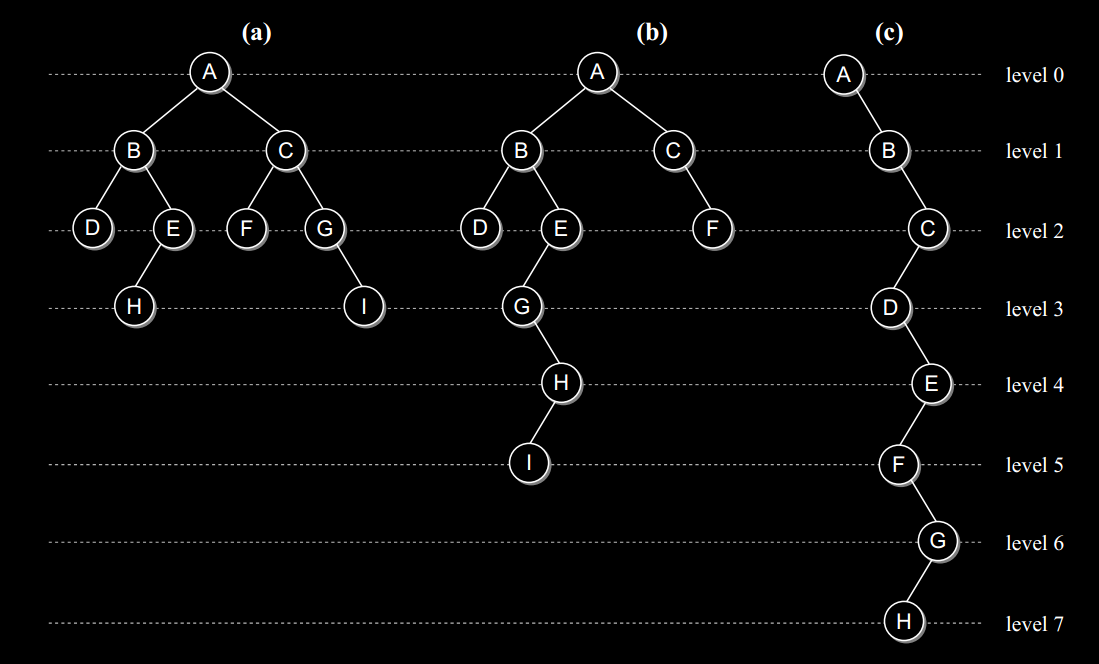

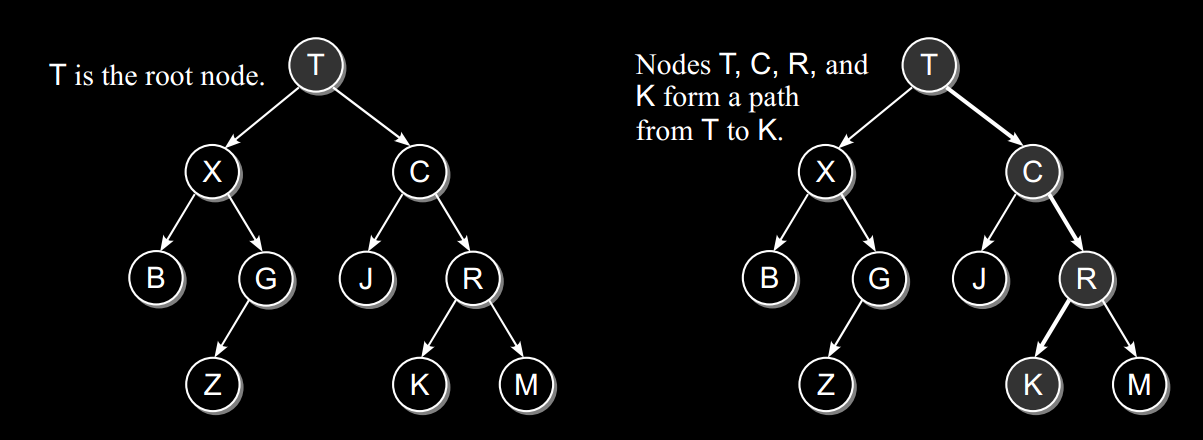

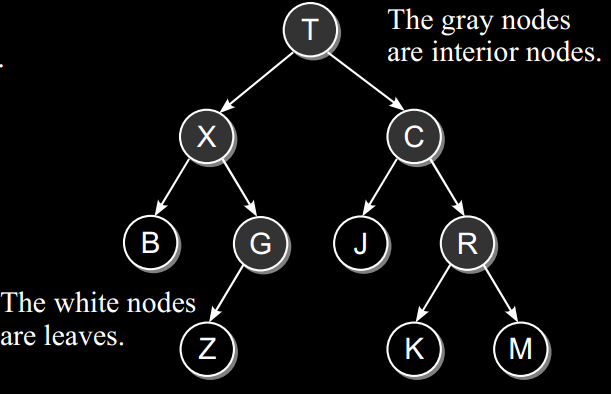

Every node determines a subtree, consisting of its descendants. 
It is the root of its subtree.  

Similarly, in a binary tree, each node has a lefth subtree and a right subtree. 

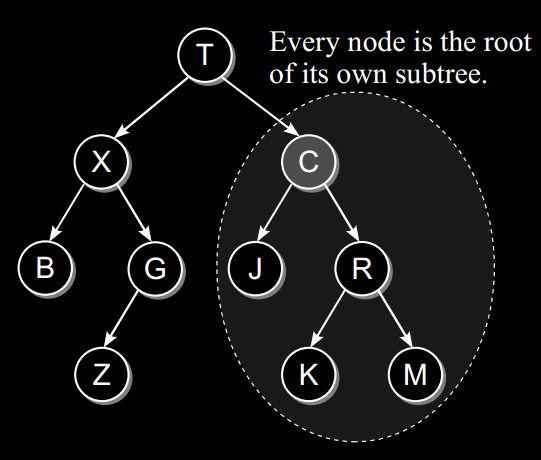


The **height** of a node is the maximum depth of the nodes in its subtree. The height of the tree itself is the height of its root. 

The **width** of a binary tree is the number of nodes on the level containing the most nodes.

The size of a binary tree is simply the number of nodes in the tree.


The minimum height of a binary tree of size $n$:  when all of the levels are filled to capacity (i.e. $2^i$), except possibly the last one. So the minimum height is $[\log_2 n] + 1$.


As we can see, a linked list is a special case of a binary tree. However in a linked list finding an element is $O(n)$ in the worst case, however a binary tree can be arranged so that no element is farther than $\log n$ from the root. 


## Types of binary tree
A **full binary tree** is a binary tree in which each interior node contains two
children.
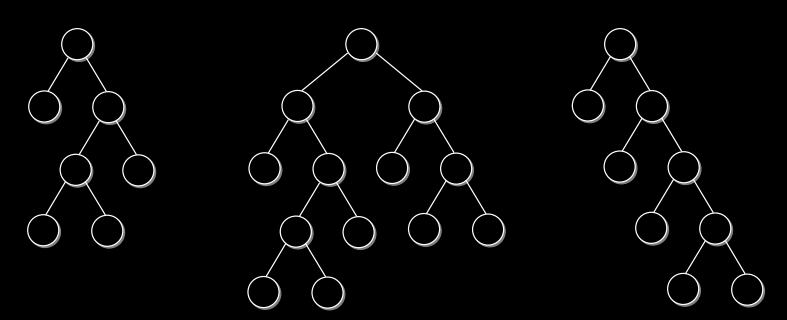

A **perfect binary tree** is a full binary tree in which all leaf nodes are at the
same level.
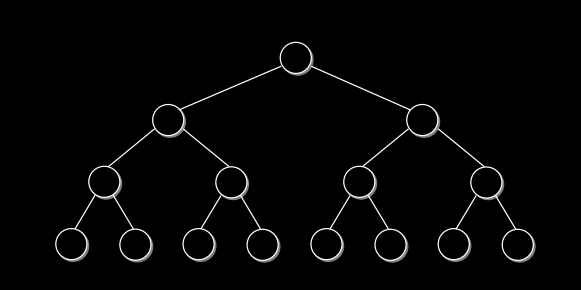


A binary tree of height h is a **complete binary tree** if it is a perfect binary tree
down to height h − 1 and the nodes on the lowest level fill the available slots from
left to right leaving no gaps.

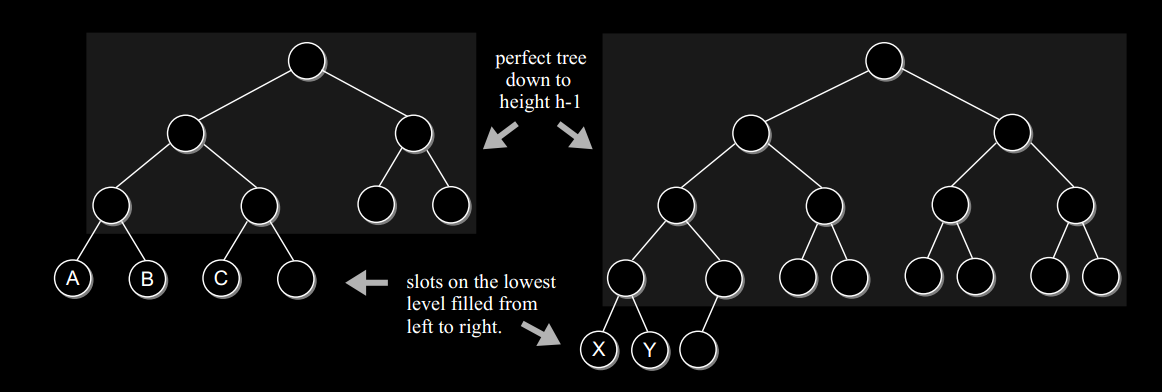

In [ ]:
# The storage class for creating binary tree nodes.
class _BinTreeNode :
     def __init__( self, data ):
         self.data = data
         self.left = None
         self.right = None
         self.parent= None


# Traversing a tree
As opposed to a sequence, there is no unique way to traverse a tree.

A binary tree has an inherent order:  
For any node $v$, the nodes in the left subtree of $v$ is before $v$, then is $v$ and then the right subtree of $v$. 
### Inorder traversal
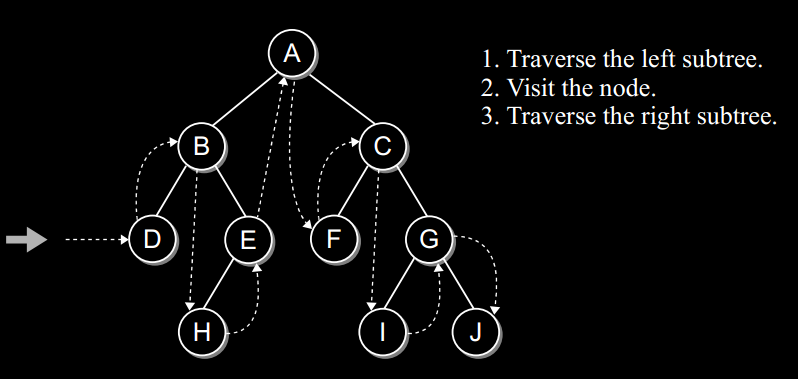

Traversing a binary tree in this way is called ** Depth First Search (DFS)**. 

**Exercise:** do the DFS for the three examples of binary trees in the second figure of this notebook.

Note: this is also called _inorder_. We can also have _preorder_ ($v$, left subtree, right subtree) and _post order_ (left subtree, right subtree, $v$). 

In [1]:
#Inorder traversal on a binary tree.
def inorderTrav( node ):
     if node is not None :
         if subtree.left:
            inorderTrav( subtree.left )
         print( node.data )
        
         if subtree.right:
            inorderTrav( subtree.right )




# Dynamic operations
## Adding a node

must preserve traversal order

 To insert a node <B> before a given node <A> in the traversal order, 
either node <A> has a left child or not. If <A> does not have a left child, than we can simply add 
<B> as the left child of <A>. Otherwise, if <A> has a left child, we can add <B> as the right child of 
the last node in <A>’s left subtree (which cannot have a right child). 
    O(h) time. 
    

In [ ]:
def subtree_insert_before(A, B): # O(h)
2 if A.left:
3 A = A.left.subtree_last()
4 A.right, B.parent = B, A
5 else:
6 A.left, B.parent = B, A
7 # A.maintain() # wait for R07!
8
9 def subtree_insert_after(A, B): # O(h)
10 if A.right:
11 A = A.right.subtree_first()
12 A.left, B.parent = B, A
13 else:
14 A.right, B.parent = B, A
15 # A.maintain() # wait for R07!



In [ ]:
## Deleting a node
 If the node is a leaf, then we can simply clear the 
child pointer from the node’s parent and return the node. Alternatively, if the node is not a leaf, we 
can swap the node’s item with the item in the node’s successor or predecessor down the tree until 
the item is in a leaf which can be removed. Since swapping only occurs down the tree, again this 
operation runs in O(h) time. 

In [ ]:
def subtree_delete(A): # O(h)
2 if A.left or A.right: # A is not a leaf
3 if A.left: B = A.predecessor()
4 else: B = A.successor()
5 A.item, B.item = B.item, A.item
6 return B.subtree_delete()
7 if A.parent: # A is a leaf
8 if A.parent.left is A: A.parent.left = None
9 else: A.parent.right = None
10 # A.parent.maintain() # wait for R07!
11 return A



In [ ]:
class Binary_Node:
2 def __init__(A, x): # O(1)
3 A.item = x
4 A.left = None
5 A.right = None
6 A.parent = None
7 # A.subtree_update() # wait for R07!
8
9 def subtree_iter(A): # O(n)
10 if A.left: yield from A.left.subtree_iter()
11 yield A
12 if A.right: yield from A.right.subtree_iter()
13
14 def subtree_first(A): # O(h)
15 if A.left: return A.left.subtree_first()
16 else: return A
17
18 def subtree_last(A): # O(h)
19 if A.right: return A.right.subtree_last()
20 else: return A
21
22 def successor(A): # O(h)
23 if A.right: return A.right.subtree_first()
24 while A.parent and (A is A.parent.right):
25 A = A.parent
26 return A.parent
27
28 def predecessor(A): # O(h)
29 if A.left: return A.left.subtree_last()
30 while A.parent and (A is A.parent.left):
31 A = A.parent
32 return A.parent
33
def subtree_insert_before(A, B): # O(h)
35 if A.left:
36 A = A.left.subtree_last()
37 A.right, B.parent = B, A
38 else:
39 A.left, B.parent = B, A
40 # A.maintain() # wait for R07!
41
42 def subtree_insert_after(A, B): # O(h)
43 if A.right:
44 A = A.right.subtree_first()
45 A.left, B.parent = B, A
46 else:
47 A.right, B.parent = B, A
48 # A.maintain() # wait for R07!
49
50 def subtree_delete(A): # O(h)
51 if A.left or A.right:
52 if A.left: B = A.predecessor()
53 else: B = A.successor()
54 A.item, B.item = B.item, A.item
55 return B.subtree_delete()
56 if A.parent:
57 if A.parent.left is A: A.parent.left = None
58 else: A.parent.right = None
59 # A.parent.maintain() # wait for R07!
60 return A



In [ ]:
class Binary_Tree:
2 def __init__(T, Node_Type = Binary_Node):
3 T.root = None
4 T.size = 0
5 T.Node_Type = Node_Type
6
7 def __len__(T): return T.size
8 def __iter__(T):
9 if T.root:
10 for A in T.root.subtree_iter():
11 yield A.item

# Expression trees
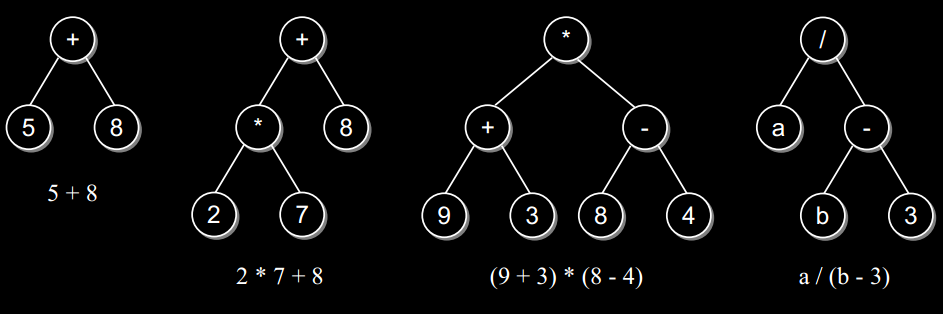

In [13]:
# Storage class for creating the tree nodes.
class _ExpTreeNode :
    def __init__( self, data ):
        self.element = data
        self.left = None
        self.right = None


class ExpressionTree :
    # Builds an expression tree for the expression string.
    def __init__( self, expStr ):
        self._expTree = None
        self._buildTree( expStr ) 
    
    # Evaluates the expression tree and returns the resulting value.
    def evaluate( self, varMap ):
        return self._evalTree( self._expTree, varMap )

    # Returns a string representation of the expression tree.
    def __str__( self ):
        return self._buildString( self._expTree )
        

    
    # Recursively builds a string representation of the expression tree.
    def _buildString( self, treeNode ):
        # If the node is a leaf, it's an operand.
        if treeNode.left is None and treeNode.right is None :
            return str( treeNode.element )
        else : # Otherwise, it's an operator.
            expStr = '('
            expStr += self._buildString( treeNode.left )
            expStr += str( treeNode.element )
            expStr += self._buildString( treeNode.right )
            expStr += ')'
            return expStr

    def _evalTree( self, subtree, varDict ):
        # See if the node is a leaf node, in which case return its value.
        if subtree.left is None and subtree.right is None :
            # Is the operand a literal digit?
            #if subtree.element >= '0' and subtree.element <= '9' :
            if subtree.element.isdigit():
                return int(subtree.element)
            else : # Or is it a variable?
                assert subtree.element in varDict, "Invalid variable."
                return varDict[subtree.element]

        # Otherwise, it's an operator that needs to be computed.
        else :
            # Evaluate the expression in the left and right subtrees.
            lvalue = _evalTree( subtree.left, varDict )
            rvalue = _evalTree( subtree.right, varDict )
            # Evaluate the operator using a helper method.
            return _computeOp( lvalue, subtree.element, rvalue )

    # Compute the arithmetic operation based on the supplied op string.
    def _computeOp( left, op, right ):
        return


SyntaxError: unexpected EOF while parsing (4176623918.py, line 57)

_evalStr
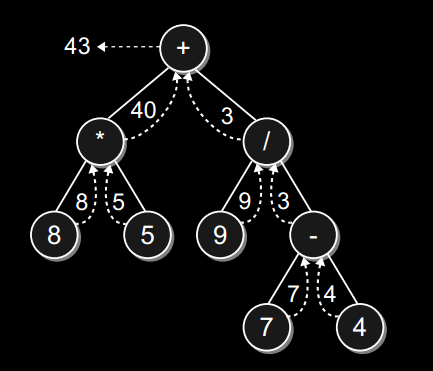

## Building the tree from infix
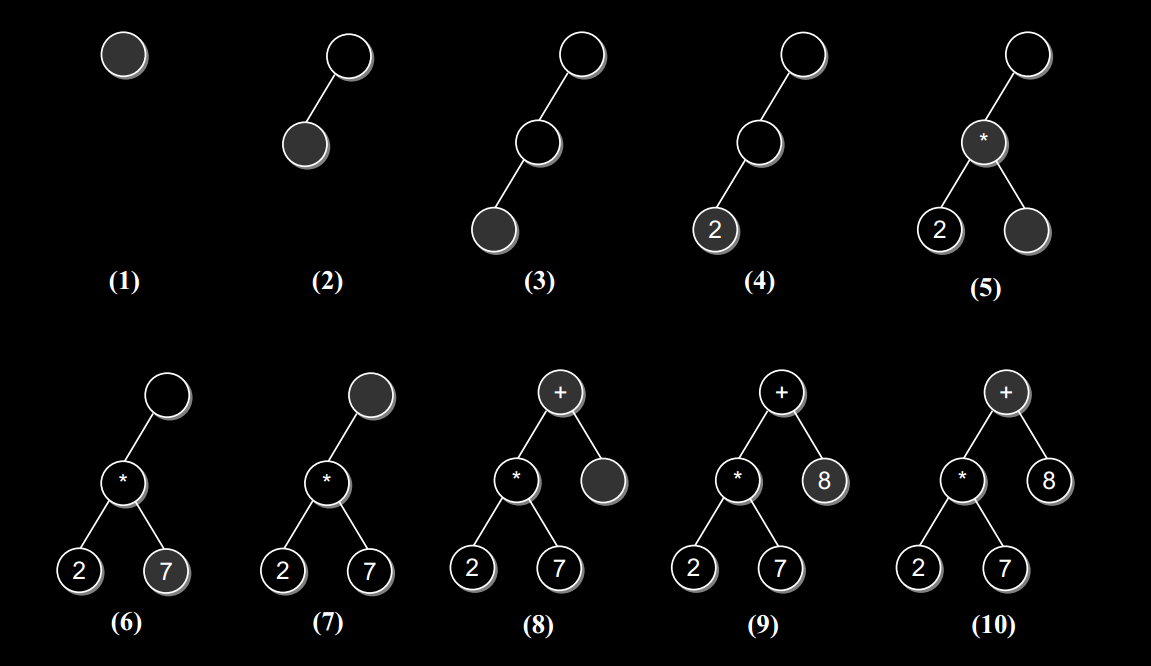

In [10]:
class ExpressionTree :

    def _buildTree( self, expStr ):
        # Build a queue containing the tokens in the expression string.
        expQ = Queue()
        for token in expStr :
            expQ.enqueue( token ) 
            # Create an empty root node.
            self._expTree = _ExpTreeNode( None )
            # Call the recursive function to build the expression tree.
            self._recBuildTree( self._expTree, expQ )

    # Recursively builds the tree given an initial root node.
    def _recBuildTree( self, curNode, expQ ):
        # Extract the next token from the queue.
        token = expQ.dequeue()

        # See if the token is a left paren: '('
        if token == '(' :
            curNode.left = _ExpTreeNode( None )
            self._buildTreeRec( curNode.left, expQ )

            # The next token will be an operator: + - /*%
            curNode.element = expQ.dequeue()
            curNode.right = _ExpTreeNode( None )
            self._buildTreeRec( curNode.right, expQ )

            # The next token will be a ), remove it.
            expQ.dequeue()

        # Otherwise, the token is a digit that has to be converted to an int.
        else :
            curNode.element = token



# Heaps

A heap is a complete binary tree in which the nodes are organized based on their
data entry values. 

- A max-heap has
the property, known as the heap order property, that for each non-leaf node V ,
the value in V is greater than the value of its two children. The largest value in a
max-heap will always be stored in the root while the smallest values will be stored
in the leaf nodes. 

- The min-heap has the opposite property. For each non-leaf
node V , the value in V is smaller than the value of its two children.

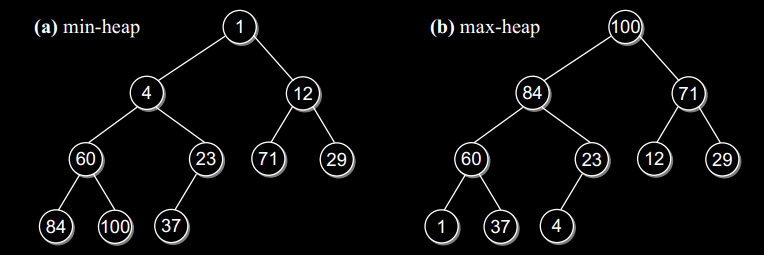

## Insertion into a heap
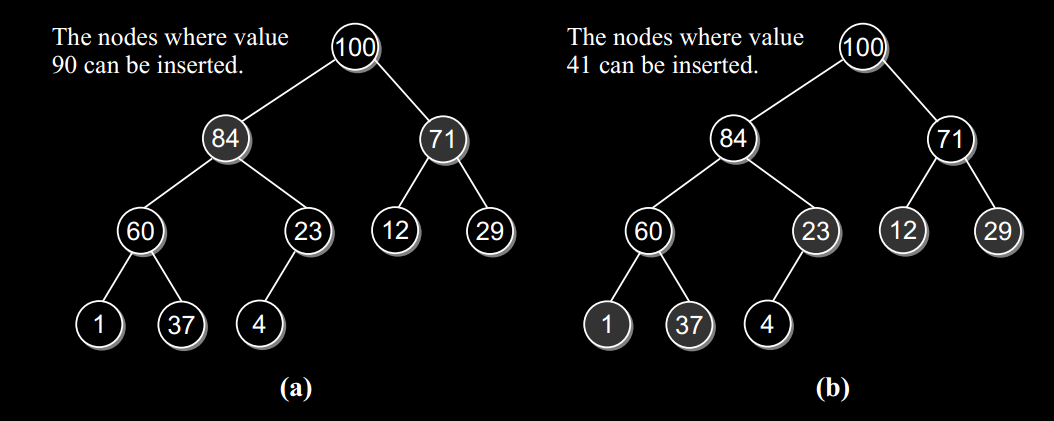
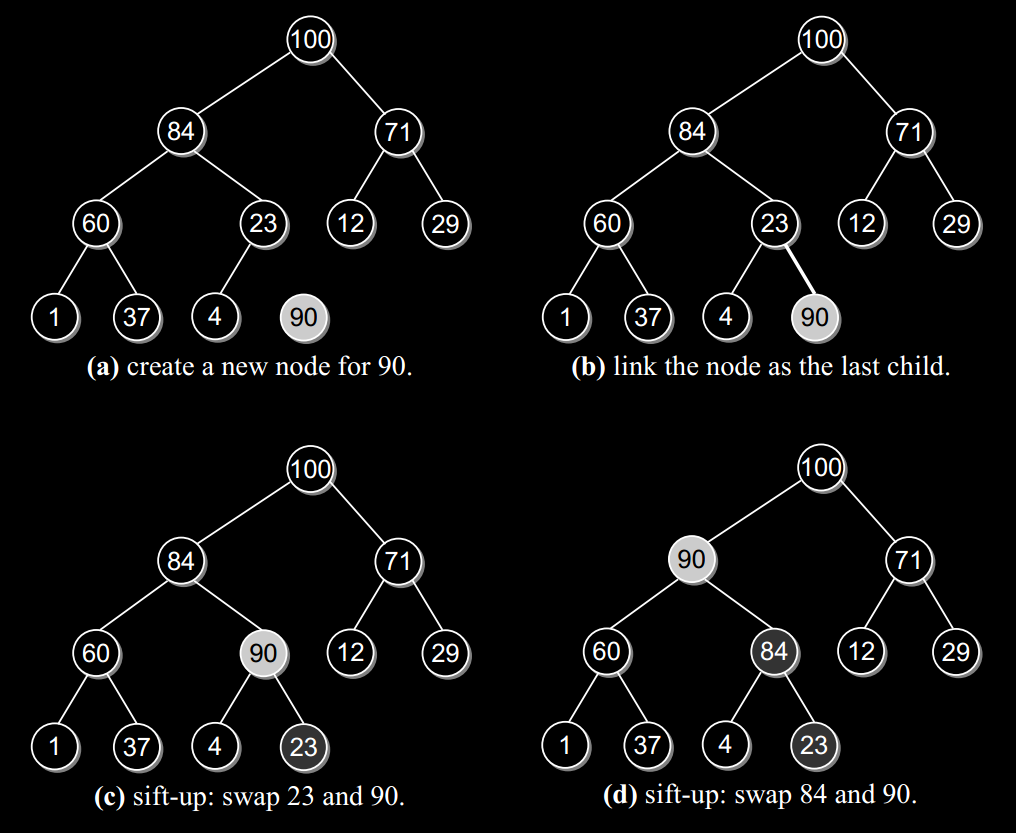
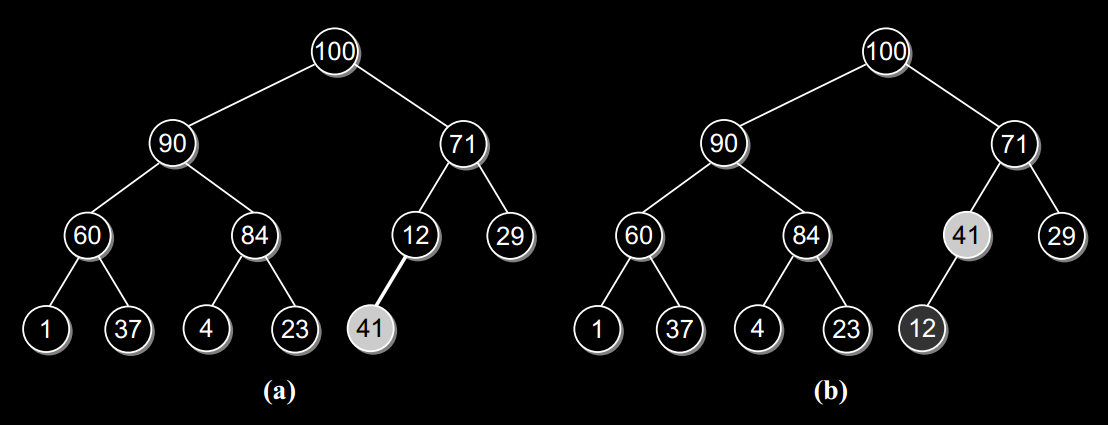


## Extractions
When a value is extracted and removed from the heap, it can only come from the
root node. Thus, in a max-heap, we always extract the largest value and in a
min-heap, we always extract the smallest value.

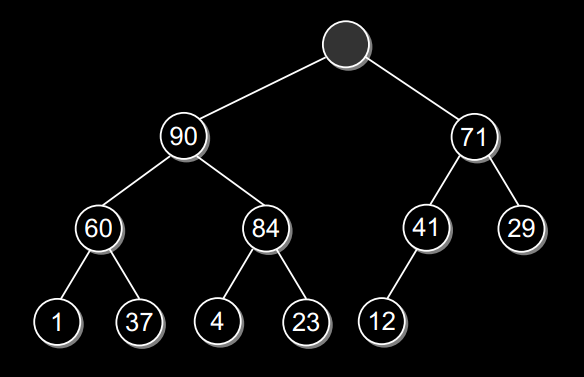

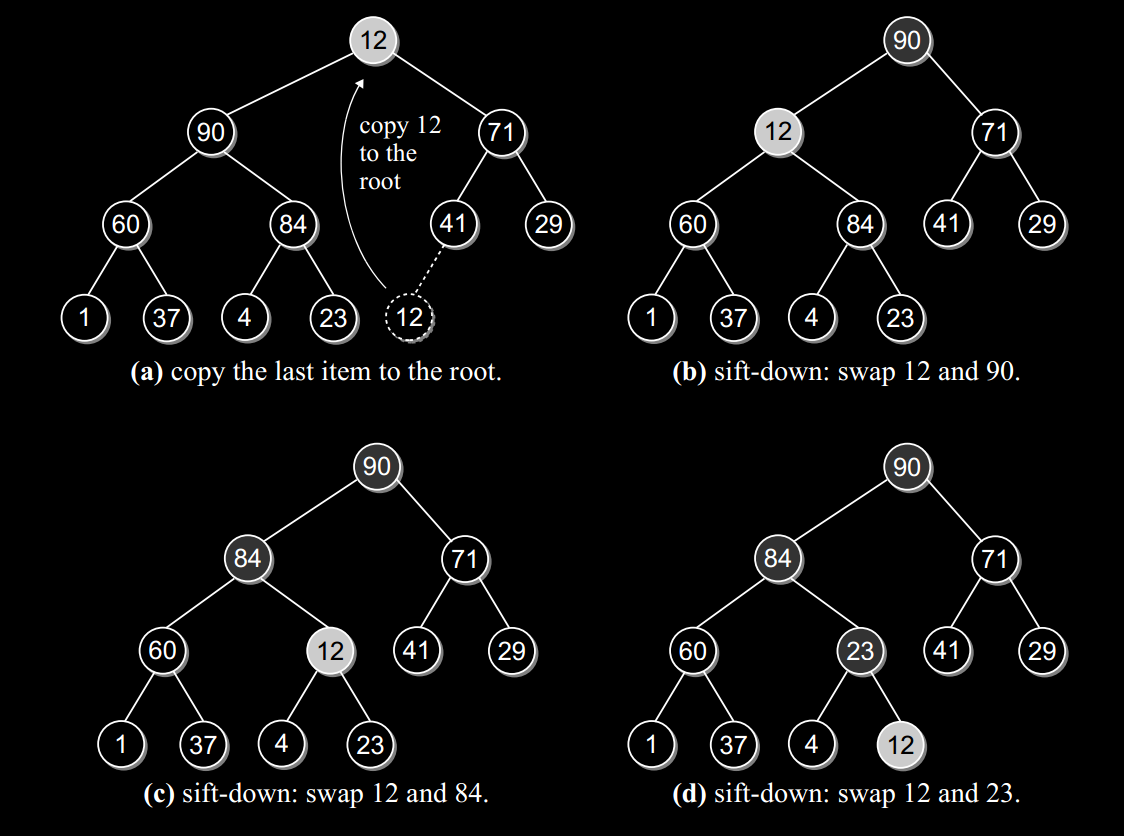

## Implementing the heap as an array

parent = (i-1) // 2

left = 2 * i + 1

right = 2 * i + 2


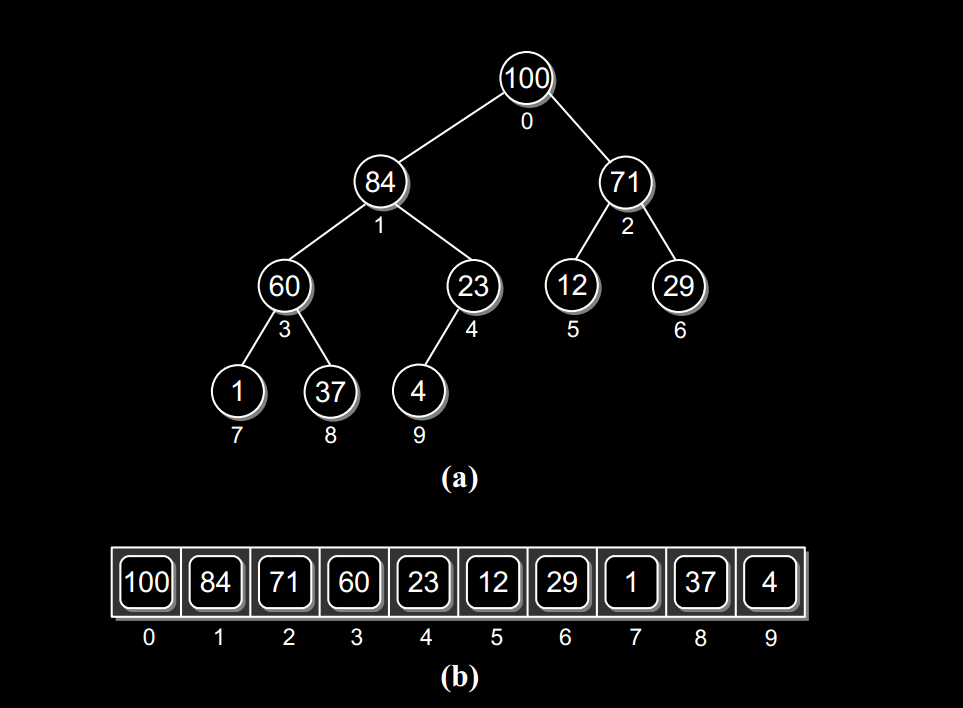

In [14]:
# An array-based implementation of the max-heap.
class MaxHeap :
    # Create a max-heap with maximum capacity of maxSize.
    def __init__( self, maxSize ):
        self._elements = Array( maxSize )
        self._count = 0 
    
    # Return the number of items in the heap.
    def __len__( self ):
        return self._count

    # Return the maximum capacity of the heap.
    def capacity( self ):
        return len( self._elements )

    # Add a new value to the heap.
    def add( self, value ):
        assert self._count < self.capacity(), "Cannot add to a full heap."
        # Add the new value to the end of the list.
        self._elements[ self._count ] = value
        self._count += 1
        # Sift the new value up the tree.
        self._siftUp( self._count - 1 )

    # Extract the maximum value from the heap.
    def extract( self ):
        assert self._count > 0, "Cannot extract from an empty heap."
        # Save the root value and copy the last heap value to the root.
        value = self._elements[0]
        self._count -= 1
        self._elements[0] = self._elements[ self._count ]
        # Sift the root value down the tree.
        self._siftDown( 0 )

        return value

    # Sift the value at the ndx element up the tree.
    def _siftUp( self, ndx ):
        if ndx > 0 :
            parent = (ndx-1) // 2
        else:
            return    
        if self._elements[ndx] > self._elements[parent] : # swap elements
            tmp = self._elements[ndx]
            self._elements[ndx] = self._elements[parent]
            self._elements[parent] = tmp
            self._siftUp( parent )

    # Sift the value at the ndx element down the tree.
    def _siftDown( self, ndx ):
        left = 2 * ndx + 1
        right = 2 * ndx + 2
        # Determine which node contains the larger value.
        largest = ndx
        if left < count and self._elements[left] >= self._elements[largest] :
            largest = left
        elif right < count and self._elements[right] >= self._elements[largest]:
            largest = right
        # If the largest value is not in the current node (ndx), swap it with
        # the largest value and repeat the process.
        if largest != ndx :
            swap( self._elements[ndx], self._elements[largest] )
            _siftDown( largest )


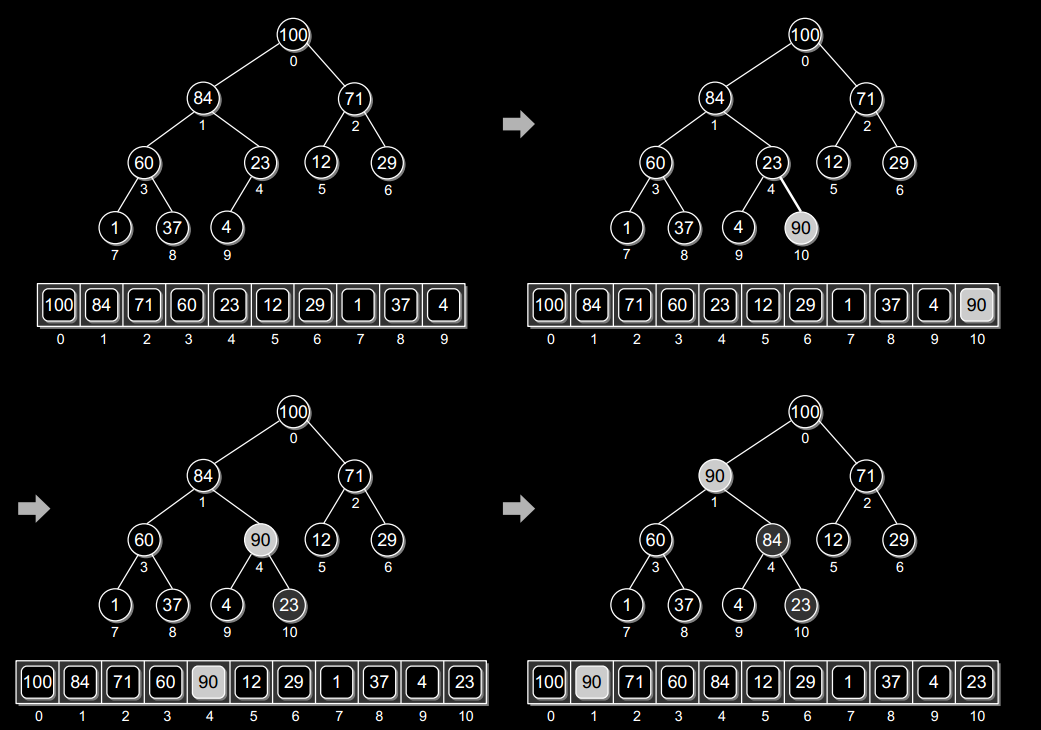

## Efficiency analysis

Inserting an item into a heap implemented as an array requires O(log n) time in
the worst case. 

Extracting an item from a heap implemented as an array also requires O(log n)
time in the worst case.

# Priority queue implemented by a min-heap
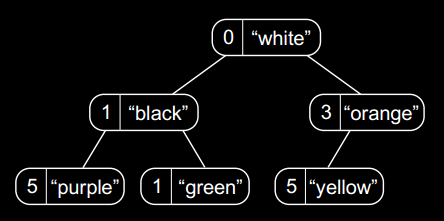

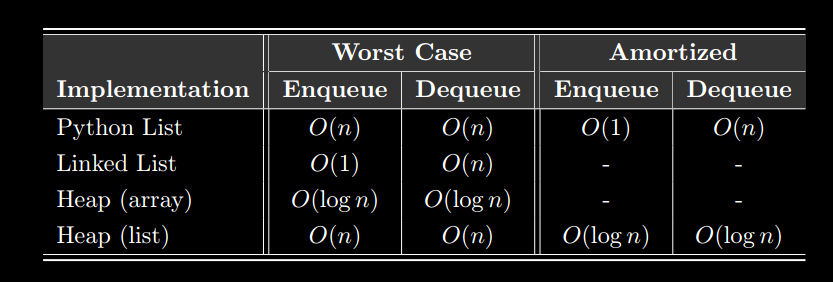

# Application: Morse code
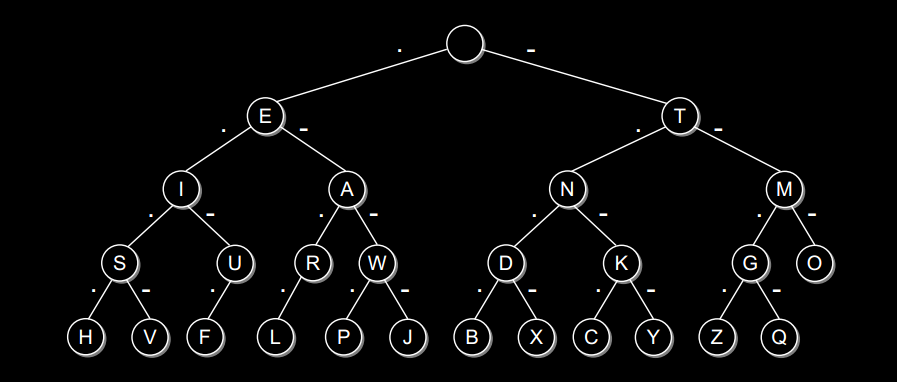
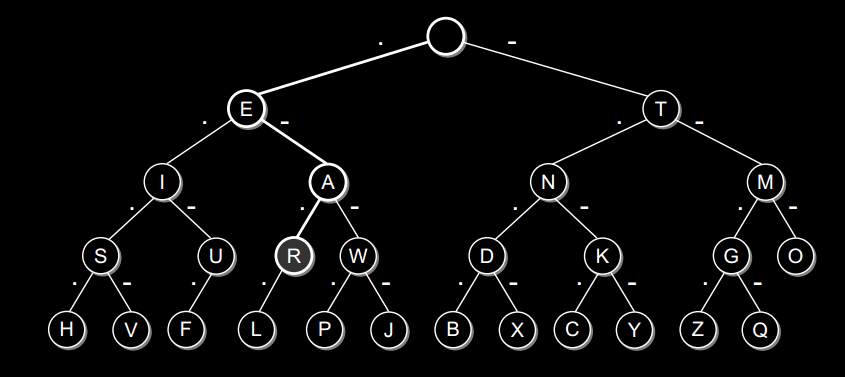

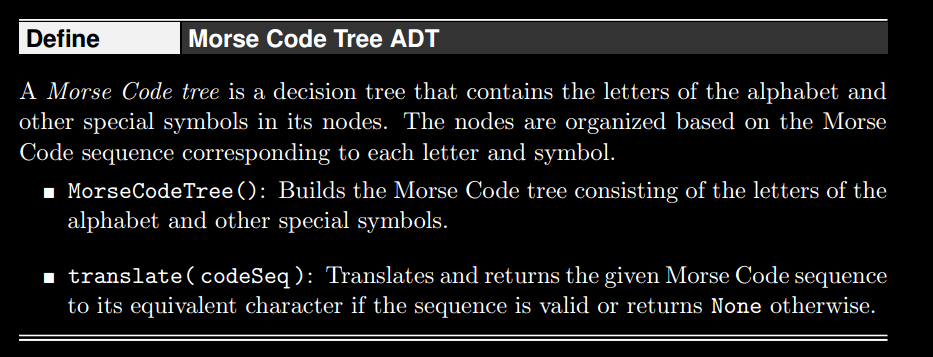

In [ ]:
b